In [107]:
"""
Author: Moustafa Alzantot (malzantot@ucla.edu)
All rights reserved Networked and Embedded Systems Lab (NESL), UCLA.
Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
"""

'\nAuthor: Moustafa Alzantot (malzantot@ucla.edu)\nAll rights reserved Networked and Embedded Systems Lab (NESL), UCLA.\nPermission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:\nThe above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.\nTHE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN 

In [108]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [109]:
import data_utils
import model_utils
import model

In [110]:
import matplotlib.pyplot as plt
%matplotlib inline

In [111]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import numpy as np

INFO:tensorflow:Disabling eager execution
INFO:tensorflow:Disabling v2 tensorshape
INFO:tensorflow:Disabling resource variables
INFO:tensorflow:Disabling tensor equality
INFO:tensorflow:Disabling control flow v2


In [112]:
data = data_utils.load_training_data()

## Training the model

In [113]:
# To get reasonable outputs, should use something bigger than 1000 !
num_epochs = 1000

In [114]:
model_utils.reset_session_and_model()
with tf.Session() as sess:
    train_config = model.ModelConfig()
    test_config = model.ModelConfig()
    train_config.learning_rate = 0.0003
    train_config.num_layers = 1 
    test_config.num_layers = 1
    test_config.batch_size = 1
    test_config.num_steps = 1
    loader = data_utils.DataLoader(data=data,batch_size=train_config.batch_size, num_steps=train_config.num_steps)
    train_model = model.MDNModel(train_config, True)
    test_model = model.MDNModel(test_config, False)
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    for idx in range(num_epochs):
        epoch_loss = train_model.train_for_epoch(sess, loader)
        print(idx, ' ', epoch_loss)
        if (idx+1) % 100 == 0:
            saver.save(sess, './models/mdnmodel.ckpt', global_step=idx)


Tensor("mdn_model/add_1:0", shape=(40, 72), dtype=float32)
Tensor("mdn_model/strided_slice_2:0", shape=(40, 24), dtype=float32)
Tensor("mdn_model/strided_slice:0", shape=(40, 24), dtype=float32)
Tensor("mdn_model/Exp:0", shape=(40, 24), dtype=float32)
Tensor("mdn_model/y:0", shape=(4, 10, 1), dtype=float32)
Tensor("mdn_model_1/add_1:0", shape=(1, 72), dtype=float32)
Tensor("mdn_model_1/strided_slice_2:0", shape=(1, 24), dtype=float32)
Tensor("mdn_model_1/strided_slice:0", shape=(1, 24), dtype=float32)
Tensor("mdn_model_1/Exp:0", shape=(1, 24), dtype=float32)
0   0.4994946
1   0.23273477
2   0.17373797
3   0.13841279
4   0.12777117
5   0.12243265
6   0.11908212
7   0.1159654
8   0.113322265
9   0.11109974
10   0.10972757
11   0.10850485
12   0.107921265
13   0.10729239
14   0.10708082
15   0.106731795
16   0.10672951
17   0.10648785
18   0.10657393
19   0.106401354
20   0.106536716
21   0.10639803
22   0.10656062
23   0.106440745
24   0.10661525
25   0.10649505
26   0.10668649
27   0.10

430   -1.230418
431   -1.1688086
432   -1.1443855
433   -1.1986662
434   -1.2023901
435   -1.1871586
436   -1.2023029
437   -1.2226766
438   -1.1142387
439   -1.2577386
440   -1.2073513
441   -1.0865568
442   -1.2241392
443   -1.1261655
444   -1.1599032
445   -1.2492201
446   -1.163444
447   -1.160687
448   -1.1216222
449   -1.1190299
450   -1.1783805
451   -1.1652956
452   -1.1853592
453   -1.2097383
454   -1.1663598
455   -1.2387061
456   -1.2141643
457   -1.1365418
458   -1.2069358
459   -1.2870277
460   -1.1778117
461   -1.1934743
462   -1.212078
463   -1.222409
464   -1.2174716
465   -1.1667198
466   -1.0975257
467   -1.2423412
468   -1.1668359
469   -1.2056385
470   -1.2010045
471   -1.2173334
472   -1.1995153
473   -1.2939811
474   -1.1935583
475   -1.2113717
476   -1.1824969
477   -1.141936
478   -1.2660506
479   -1.2452775
480   -1.2130418
481   -1.3118405
482   -1.2072637
483   -1.2222204
484   -1.2232933
485   -1.2080133
486   -1.1795155
487   -1.249831
488   -1.1831646
489 

917   -1.4743998
918   -1.489481
919   -1.4233752
920   -1.5036852
921   -1.4289466
922   -1.4935066
923   -1.4526325
924   -1.5073762
925   -1.4725031
926   -1.3768066
927   -1.4006977
928   -1.4849209
929   -1.5067321
930   -1.5073609
931   -1.4914521
932   -1.4847829
933   -1.4908903
934   -1.4443668
935   -1.4851797
936   -1.4731163
937   -1.5079434
938   -1.4435537
939   -1.4911991
940   -1.4912554
941   -1.493252
942   -1.5004828
943   -1.4433125
944   -1.4197334
945   -1.5112686
946   -1.4519937
947   -1.5061027
948   -1.4851576
949   -1.4919822
950   -1.472862
951   -1.49093
952   -1.4845424
953   -1.5343614
954   -1.4904543
955   -1.5208144
956   -1.5206963
957   -1.5405576
958   -1.5017799
959   -1.4677126
960   -1.5021063
961   -1.5585958
962   -1.4697073
963   -1.5004562
964   -1.4802957
965   -1.5559527
966   -1.4578347
967   -1.5461074
968   -1.4832071
969   -1.4629604
970   -1.4727848
971   -1.3688548
972   -1.475178
973   -1.5491942
974   -1.5350498
975   -1.5261915
976

## Sampling from a trained model

Tensor("mdn_model/add_1:0", shape=(1, 72), dtype=float32)
Tensor("mdn_model/strided_slice_2:0", shape=(1, 24), dtype=float32)
Tensor("mdn_model/strided_slice:0", shape=(1, 24), dtype=float32)
Tensor("mdn_model/Exp:0", shape=(1, 24), dtype=float32)
Tensor("mdn_model/y:0", shape=(1, 1, 1), dtype=float32)
INFO:tensorflow:Restoring parameters from models/mdnmodel.ckpt-999


Text(0.5, 1.0, 'Fake data')

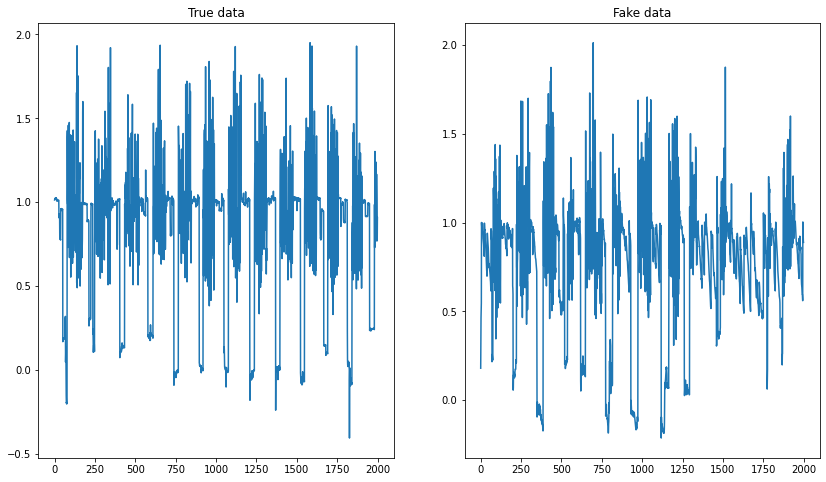

In [115]:
ckpt_path = 'models/mdnmodel.ckpt-999'
seq_len = 2000
model_utils.reset_session_and_model()
true_data = data[0,:2000]
with tf.Session() as sess:
    test_config = model.ModelConfig()
    test_config.num_layers = 1
    test_config.batch_size = 1
    test_config.num_steps = 1
    test_model = model.MDNModel(test_config, True)
    test_model.is_training = False
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    saver.restore(sess, ckpt_path)
    fake_data = test_model.predict(sess, seq_len)
fig, axes = plt.subplots(1,2, figsize=((14,8)))
axes[0].plot(true_data)
axes[0].set_title('True data')
axes[1].plot(fake_data)
axes[1].set_title('Fake data')